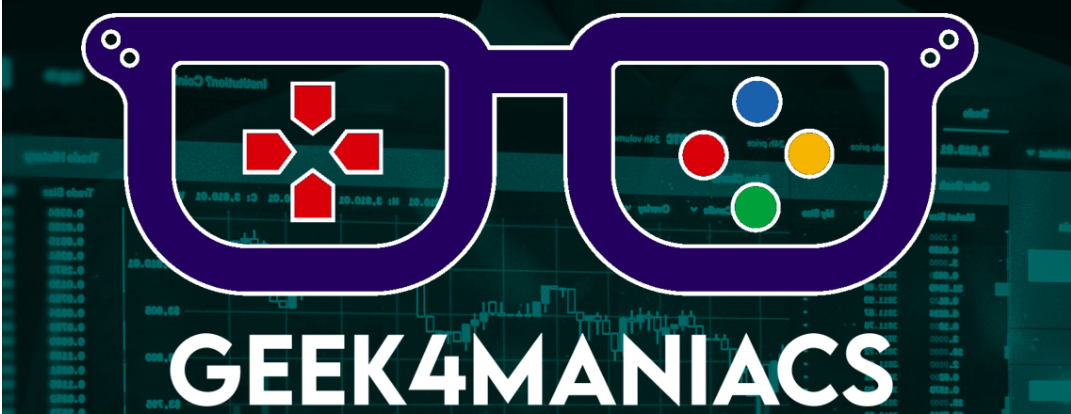
Imagínate que estás jugando un juego de mesa, como Monopolio. Cada vez que tiras los dados, hay un conjunto de posibles resultados, que van del 2 al 12. Cada uno de estos resultados puede afectar tu progreso en el juego de manera diferente: puedes caer en una propiedad y tener que pagar alquiler, o caer en una casilla que te permita comprar una propiedad, o incluso ir a la cárcel.



La simulación de Monte Carlo es como si jugáramos ese juego de Monopolio miles o incluso millones de veces, cada vez con diferentes lanzamientos de dados, y luego viéramos cuál es el resultado más común o cuáles son los resultados posibles. Nos permite ver todas las diferentes formas en que el juego podría desarrollarse, en lugar de solo jugar una vez y ver un solo resultado.

En finanzas, esto se aplica a las inversiones. Digamos que tienes acciones en una empresa. La "tirada de dados" podría ser cosas como cuánto dinero gana la empresa, cuántas personas compran sus productos, cuánto cuesta producir esos productos, etc. Al igual que en el juego de Monopolio, todas estas cosas pueden cambiar cuánto valen tus acciones.

Entonces, en lugar de simplemente adivinar cuánto podrían valer tus acciones en el futuro, podríamos usar una simulación de Monte Carlo para jugar "juegos" de inversión millones de veces, cada vez con diferentes "tiradas de dados". Al final, tendríamos una buena idea de cuánto podrían valer tus acciones en el futuro, y cuánto riesgo hay de que pierdas dinero.

Así que, en resumen, la simulación de Monte Carlo es como un juego de mesa muy grande y muy complicado que nos ayuda a entender mejor los riesgos y las posibilidades de nuestras decisiones financieras.

Para este ejemplo, primero necesitamos instalar la biblioteca yfinance, que nos permitirá obtener los datos de precios de Ethereum.

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Obtenemos los datos de Ethereum de los últimos 5 años
data = yf.download('ETH-USD', start='2018-07-01', end='2023-07-01')

# Calculamos los rendimientos logarítmicos, que es lo que normalmente se utiliza en este tipo de análisis
returns = np.log(data['Close']).diff().dropna()


[*********************100%***********************]  1 of 1 completed


Ahora que tenemos los rendimientos, podemos aplicar una simulación de Monte Carlo. En este ejemplo, vamos a prever los precios de Ethereum para los próximos 365 días.

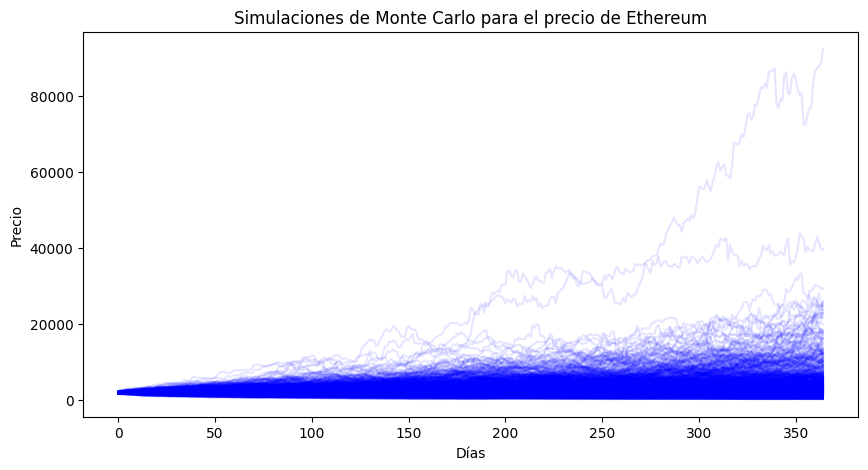

In [2]:
np.random.seed(42)  # fijamos una semilla para que los resultados sean reproducibles

n_simulations = 1000  # número de simulaciones a realizar
n_days = 365  # número de días a prever

last_price = data['Close'][-1]  # último precio conocido, desde donde empezarán las predicciones

# Inicializamos la matriz que guardará los resultados
simulations = np.zeros((n_simulations, n_days))

# Realizamos las simulaciones
for i in range(n_simulations):
    # Generamos los rendimientos simulados
    simulated_returns = np.random.choice(returns, n_days)

    # Calculamos los precios simulados
    simulated_prices = last_price * np.exp(np.cumsum(simulated_returns))

    # Guardamos los precios simulados
    simulations[i] = simulated_prices

# Graficamos los resultados
plt.figure(figsize=(10, 5))
for i in range(n_simulations):
    plt.plot(simulations[i], color='blue', alpha=0.1)
plt.xlabel('Días')
plt.ylabel('Precio')
plt.title('Simulaciones de Monte Carlo para el precio de Ethereum')
plt.show()


En este gráfico, cada línea representa una posible trayectoria del precio de Ethereum durante los próximos 365 días, según nuestras simulaciones de Monte Carlo.

Por supuesto, ten en cuenta que este es un modelo muy simple. Hay muchos factores que podrían afectar el precio de Ethereum que no estamos considerando. Siempre debes utilizar múltiples fuentes de información y análisis antes de tomar decisiones de inversión.



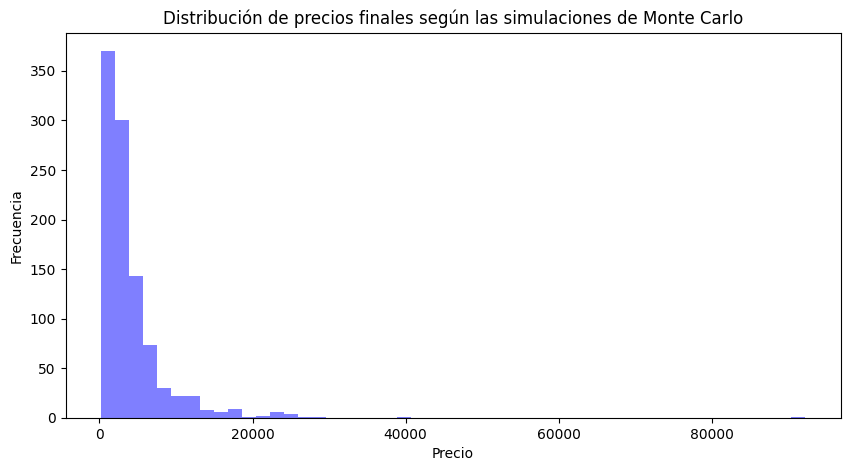

El precio más probable es: 4037.9493917512295


In [3]:
# Obtén los precios finales de todas las simulaciones
final_prices = simulations[:, -1]

# Genera un histograma de los precios finales
plt.figure(figsize=(10, 5))
plt.hist(final_prices, bins=50, color='blue', alpha=0.5)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios finales según las simulaciones de Monte Carlo')
plt.show()

# Encuentra el precio más probable
most_probable_price = np.mean(final_prices)
print(f'El precio más probable es: {most_probable_price}')


En este código, primero estamos tomando los precios finales de todas las simulaciones (el último día de cada simulación). Luego, estamos generando un histograma de estos precios, que muestra cuántas simulaciones terminaron en cada rango de precio.

Finalmente, estamos calculando el precio más probable como el promedio de los precios finales. Esto se basa en la suposición de que los resultados de nuestra simulación siguen una distribución normal, lo cual es una suposición razonable en muchos casos, pero no siempre es cierto.

Ten en cuenta que el precio más probable no necesariamente será el más alto en el histograma, ya que este muestra la distribución de los resultados pero no su probabilidad.

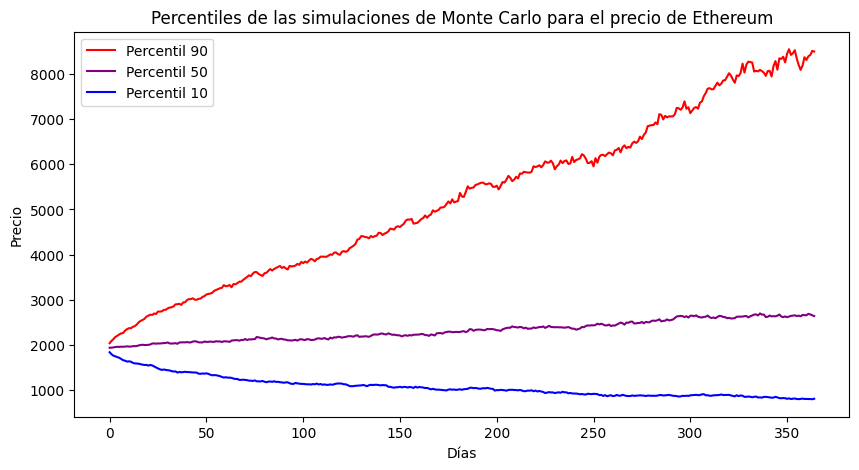

In [4]:
# Calcula los percentiles 10, 50 y 90 en cada día
percentile_10 = np.percentile(simulations, 10, axis=0)
percentile_50 = np.percentile(simulations, 50, axis=0)
percentile_90 = np.percentile(simulations, 90, axis=0)

# Grafica los percentiles
plt.figure(figsize=(10, 5))
plt.plot(percentile_90, color='red', label='Percentil 90')
plt.plot(percentile_50, color='purple', label='Percentil 50')
plt.plot(percentile_10, color='blue', label='Percentil 10')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.title('Percentiles de las simulaciones de Monte Carlo para el precio de Ethereum')
plt.legend()
plt.show()

En este código, estamos calculando los percentiles 10, 50 y 90 de las simulaciones en cada día. Luego, estamos graficando estos percentiles. El percentil 90, que es el más rojo, representa un escenario optimista en el que el precio de Ethereum es mayor que el 90% de las simulaciones. El percentil 10, que es el más azul, representa un escenario pesimista en el que el precio de Ethereum es menor que el 90% de las simulaciones. El percentil 50, que es morado, representa el escenario mediano.

<ipython-input-5-e7fc58e5b664>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='blue')


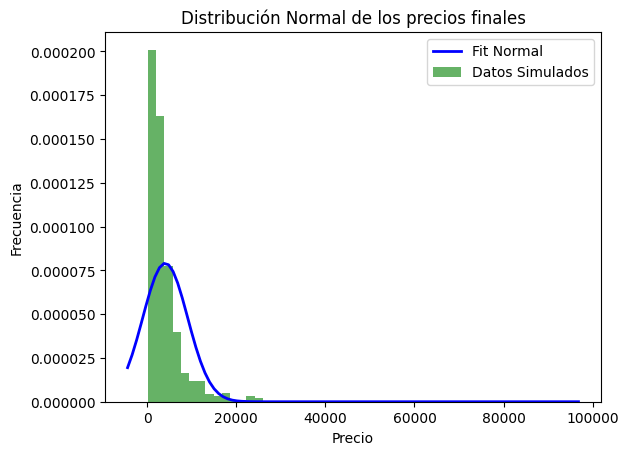

In [5]:
import scipy.stats as stats

# Cálculo de la media y la desviación estándar de los precios finales
mu, std = stats.norm.fit(final_prices)

# Creación del histograma
plt.hist(final_prices, bins=50, density=True, alpha=0.6, color='g')

# Creación de la PDF (Probability Density Function) teórica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

# Dibujado de la PDF teórica sobre el histograma
plt.plot(x, p, 'k', linewidth=2, color='blue')

# Título y leyenda
plt.title('Distribución Normal de los precios finales')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend(['Fit Normal', 'Datos Simulados'])

plt.show()


En este código, primero ajustamos una distribución normal a los precios finales de las simulaciones de Monte Carlo utilizando scipy.stats.norm.fit(), que nos da la media (mu) y la desviación estándar (std) de los datos ajustados. Luego, creamos un histograma de los precios finales con plt.hist(), y luego creamos una PDF (función de densidad de probabilidad) teórica utilizando los parámetros ajustados. Finalmente, dibujamos esta PDF sobre el histograma.

Recuerda que, aunque es útil para visualizar la distribución de los resultados, el hecho de que los datos se ajusten bien a una distribución normal no significa que los resultados futuros seguirán necesariamente esta distribución. En el mundo real, los rendimientos financieros a menudo tienen colas más pesadas que una distribución normal (lo que significa que los eventos extremos son más comunes de lo que sugeriría una distribución normal), entre otras diferencias.

Las simulaciones de Monte Carlo son una herramienta poderosa en muchos campos, incluyendo las finanzas. Nos permiten modelar situaciones inciertas y entender la gama de posibles resultados, así como la probabilidad de diferentes resultados.

En los ejemplos de Python que hemos revisado, hemos usado la simulación de Monte Carlo para modelar los posibles precios futuros de Ethereum. Hemos descargado datos históricos de precios, calculado los rendimientos logarítmicos diarios y luego utilizado estos rendimientos para simular miles de posibles trayectorias de precios para el próximo año.

Hemos visto cómo visualizar estas simulaciones a través de gráficas y cómo resumirlas a través de medidas estadísticas. También hemos ajustado una distribución normal a los precios finales de nuestras simulaciones y la hemos visualizado.

A partir de estas simulaciones y visualizaciones, podemos concluir varias cosas:

Hay una amplia gama de posibles precios futuros para Ethereum, reflejando la incertidumbre inherente en las inversiones financieras.

Algunos resultados son más probables que otros, según lo indicado por el ajuste de la distribución normal y la ubicación de la media de los precios finales. Sin embargo, debemos recordar que los resultados futuros pueden no seguir exactamente esta distribución.

Los percentiles de los precios simulados nos dan una buena idea de la variabilidad de los precios. Por ejemplo, el percentil 10 representa un escenario más pesimista, mientras que el percentil 90 representa un escenario más optimista.

Es importante recordar que, aunque las simulaciones de Monte Carlo son una herramienta valiosa, no pueden predecir el futuro con certeza. Siempre hay factores imprevistos que pueden afectar los resultados reales. Por lo tanto, las simulaciones de Monte Carlo deben ser solo una parte de tu proceso de toma de decisiones en finanzas y en cualquier otro campo que involucre incertidumbre.